# Timeseries Analysis of the Prawler Chlorophyll Data 2017 M2

Prior to the following visual analysis, the Prawler data had been ingested and interpolated to hourly data in time and 1dB data in depth.  The shallowest depths the prawler recorded data at was ~3dB and the deepest ~47dB

![PrawlerTimeseries](images/17BSITAEPR_Chlor.png)

Timeseries of all prawler paramaters.  Data has been interpolated to 1dBar bins in depth and is plotted between 0-50dbar.  Gaps in data are from equipment malfunction, poor signals, and changes in sample strategies.

In [1]:
%matplotlib inline

In [2]:
import datetime
import pandas as pd


### Read in Data Set

the chlorophyl has been previously integrated between 5-45dBar from 1dBar gridded data

In [9]:
f='data/17M2_Chlor_allsources.xlsx' #previously processed Prawler data combined with EcoFluorometer data

data = pd.read_excel(f,parse_dates=True,index_col='time')

In [10]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3581 entries, 2017-04-27 18:00:00 to 2017-09-23 22:00:00.055000
Data columns (total 9 columns):
0m Prawler     3572 non-null float64
11m Prawler    3566 non-null float64
24m Prawler    3515 non-null float64
44m Prawler    3428 non-null float64
11m Eco        3572 non-null float64
0m Eco         3574 non-null float64
24m Eco        3572 non-null float64
44m Wetlabs    3572 non-null float64
55m Eco        3572 non-null float64
dtypes: float64(9)
memory usage: 279.8 KB


,0m Prawler,11m Prawler,24m Prawler,44m Prawler,11m Eco,0m Eco,24m Eco,44m Wetlabs,55m Eco
time,,,,,,,,,
2017-04-27 18:00:00,NaN,NaN,NaN,NaN,NaN,0.212084,NaN,NaN,NaN
2017-04-27 19:00:00,NaN,NaN,NaN,NaN,NaN,0.220458,NaN,NaN,NaN
2017-04-27 20:00:00,NaN,NaN,NaN,NaN,NaN,0.114483,NaN,NaN,NaN
2017-04-27 21:00:00,NaN,NaN,NaN,NaN,NaN,0.079404,NaN,NaN,NaN
2017-04-27 22:00:00,NaN,NaN,NaN,NaN,NaN,0.090648,2.029539,4.604827,3.99982


### Evaluating the entire time series

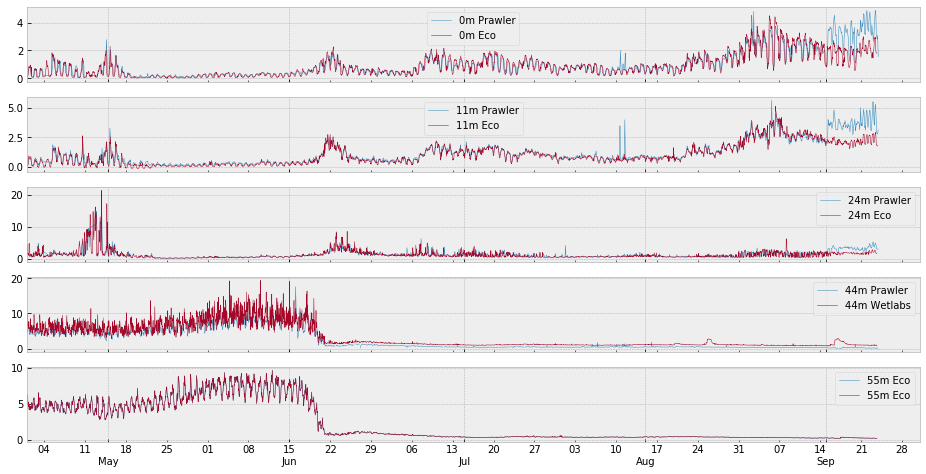

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

plt.style.use('bmh')

def axis_formater(ax):
    ax.xaxis.set_major_locator(dates.DayLocator(bymonthday=15))
    ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.legend()
    ax.set_xlim([datetime.datetime(2017,5,1),datetime.datetime(2017,10,1)])
    return (ax)

fig = plt.figure(figsize=(16,8))
plt.subplot(5,1,1)
ax=plt.gca()
plt.plot(data.index,data['0m Prawler'],linewidth=.5)
plt.plot(data.index,data['0m Eco'],linewidth=.5)
ax = axis_formater(ax)

plt.subplot(5,1,2)
ax=plt.gca()
plt.plot(data.index,data['11m Prawler'],linewidth=.5)
plt.plot(data.index,data['11m Eco'],linewidth=.5)
ax = axis_formater(ax)

plt.subplot(5,1,3)
ax=plt.gca()
plt.plot(data.index,data['24m Prawler'],linewidth=.5)
plt.plot(data.index,data['24m Eco'],linewidth=.5)
ax = axis_formater(ax)

plt.subplot(5,1,4)
ax=plt.gca()
plt.plot(data.index,data['44m Prawler'],linewidth=.5)
plt.plot(data.index,data['44m Wetlabs'],linewidth=.5)
ax = axis_formater(ax)

plt.subplot(5,1,5)
ax=plt.gca()
plt.plot(data.index,data['55m Eco'],linewidth=.5)
plt.plot(data.index,data['55m Eco'],linewidth=.5)
ax = axis_formater(ax)

ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.xaxis.set_tick_params(which='major', pad=15)



In [25]:
fig.savefig('images/17M2_Chlor_allsources.png')